Clustring

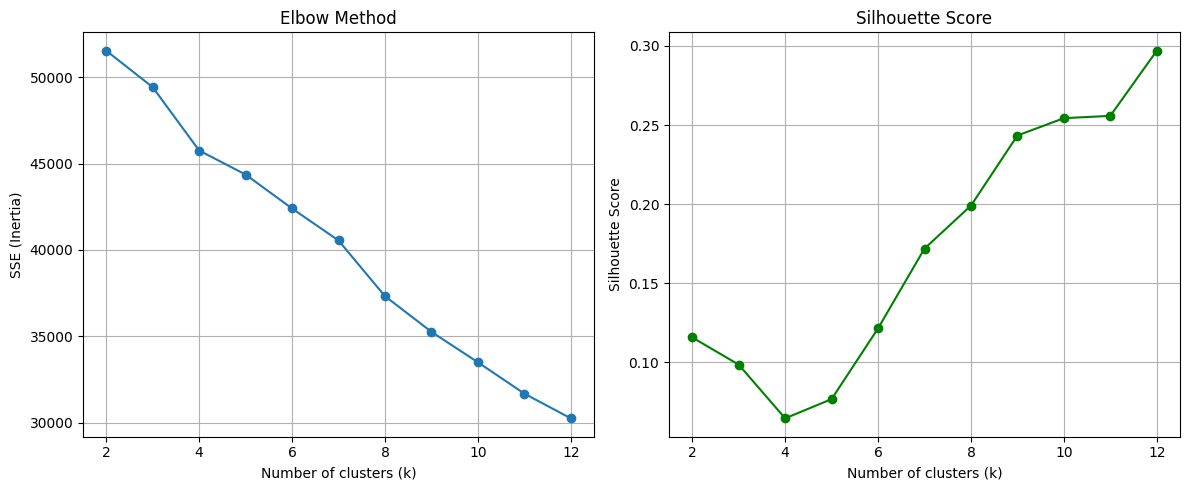

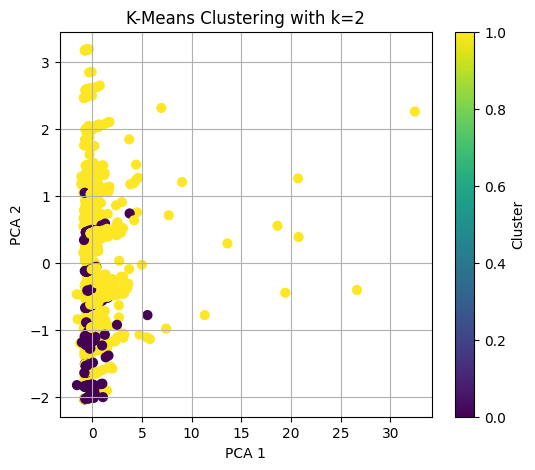

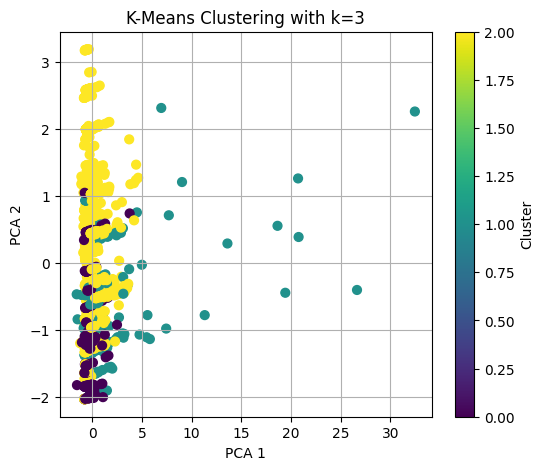

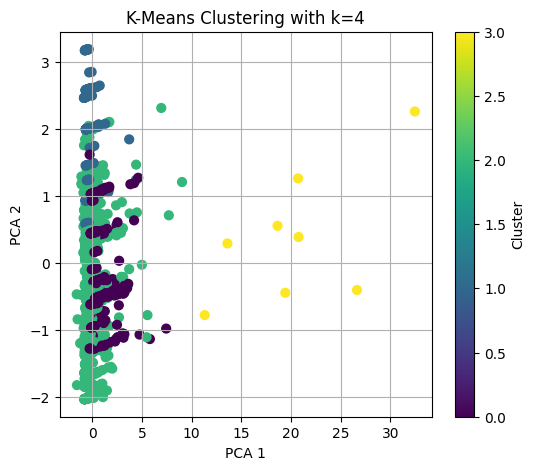

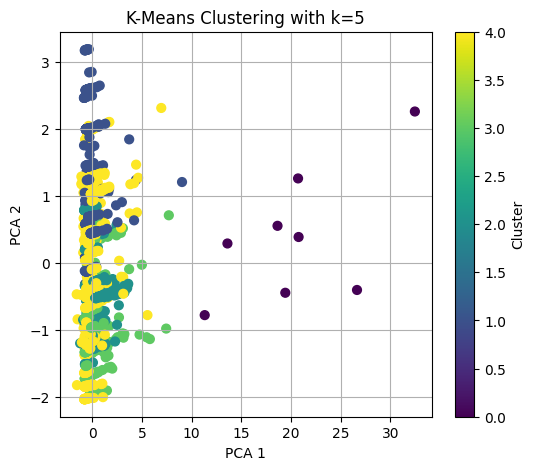

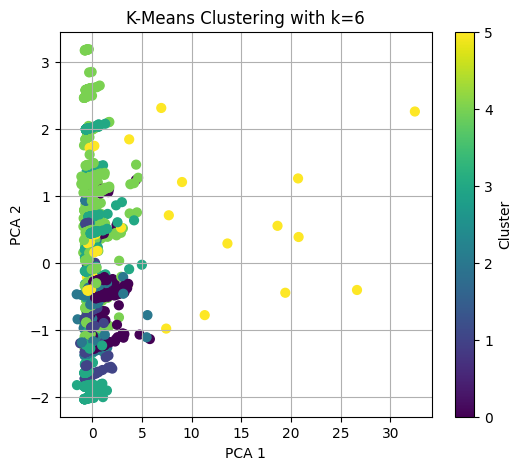

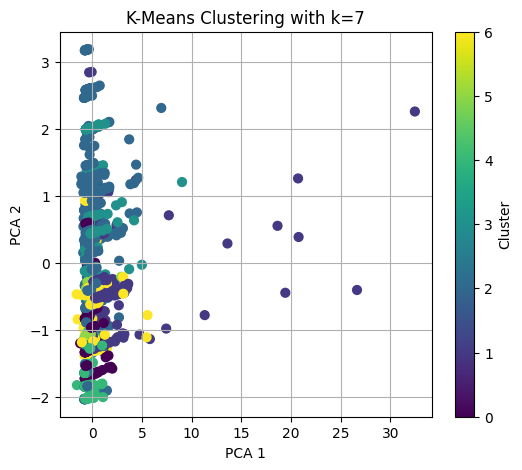

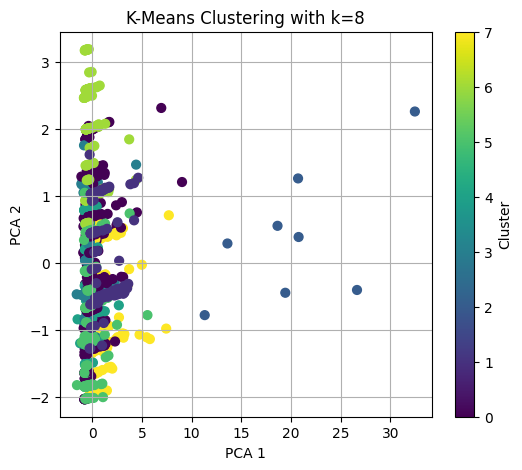

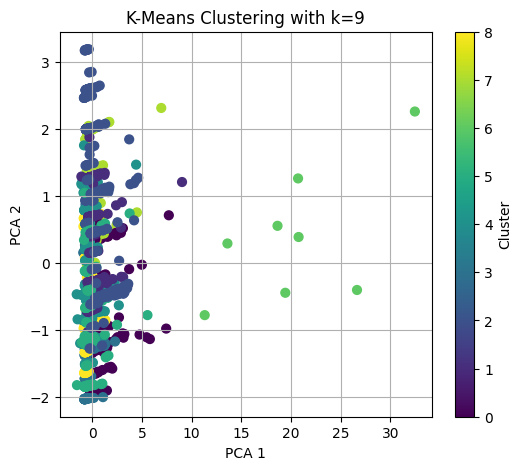

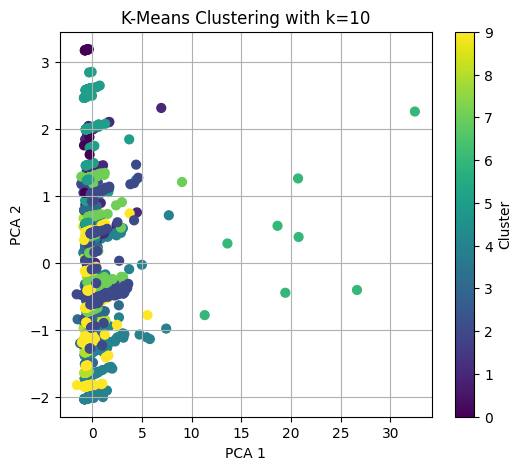

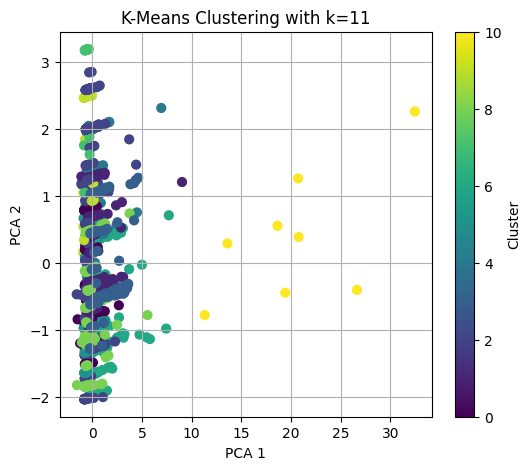

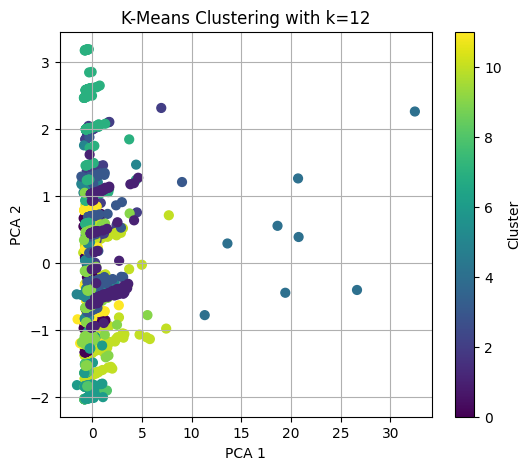

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


df = pd.read_csv("processed_data.csv")


# drop columns
drop_cols = ['Video ID', 'Title', 'Publication Time', 'Region']
df = df.drop(columns=drop_cols)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# different values of K
K_range = range(2, 13)
sse = []
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Elbow, Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, sse, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE (Inertia)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()


pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_features)


cluster_results = {}

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_features)
    cluster_results[k] = labels

    # Visualization of Cluster Distribution Using PCA for Each k
    plt.figure(figsize=(6, 5))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', s=40)
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()


In our k-means analysis, we explored various values of k ranging from 2 to 12 in order to determine the optimal number of clusters for our dataset. We evaluated K-Means using two key metrics: the Elbow Method and the Silhouette Score.

First, we used the Elbow Method, which shows the relationship between the number of clusters and the total within-cluster sum of squared errors (SSE). We noticed that the SSE decreases as the number of clusters increases. However, we typically look for the “elbow point,” where the decrease in error becomes less significant, suggesting that adding more clusters beyond this point offers only small improvements in accuracy while making the model more complex. In our case, the elbow appears to be around k = 4 or k = 5, as the drop in SSE becomes more gradual beyond that point.

Second, we used the Silhouette Score, which shows how distinct and separate the clusters are, with values closer to 1 indicating better-defined clusters. In this plot, the silhouette scores are relatively low for k = 2 to 5, which suggests that the clusters formed in this range were not very distinct. Interestingly, the score increases significantly from k = 6 onward, and continues improving, reaching its peak at k = 12, indicating that the clusters at this level are the most cohesive and well-separated.

In summary, while the Elbow Method suggests that k = 4 or 5 is the best choice, the Silhouette Score shows that the best clustering is at k = 12. Therefore, we conclude that k = 12 is the optimal number of clusters for our dataset in k-means










In [8]:
!pip install matplotlib scipy scikit-learn --quiet

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
df = pd.read_csv('processed_data.csv')
print("Shape of data:", df.shape)


Shape of data: (1856, 33)


In [16]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric = df_numeric.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)
linked = linkage(scaled_data, method='ward')

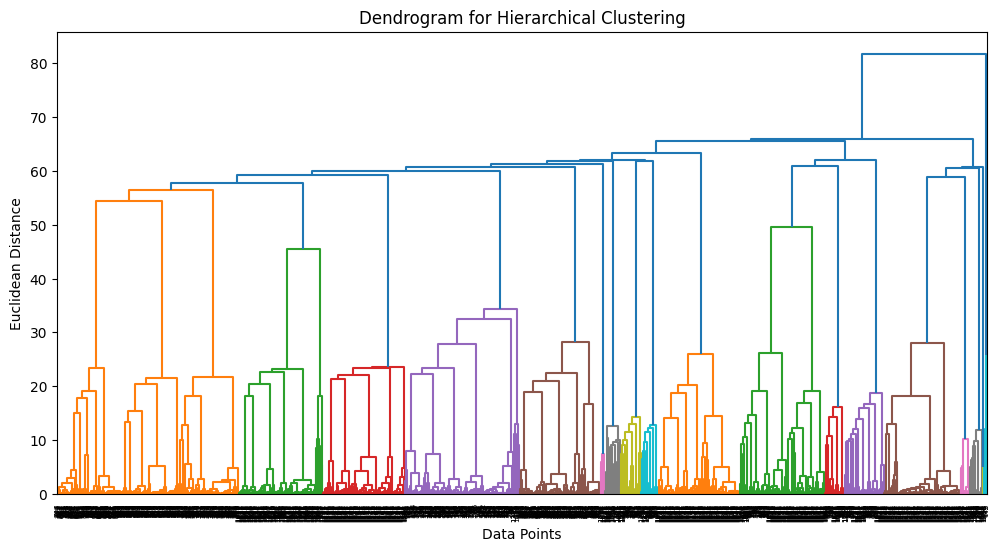

In [12]:
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

In [13]:
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['Cluster'] = cluster.fit_predict(scaled_data)
#I choose the number of clusters because I got silhouette score of 0.723 which is excellent for 2 clusters .

In [14]:
print(df['Cluster'].value_counts())
sns.pairplot(df_numeric.join(df['Cluster']), hue='Cluster', palette='Set1')
plt.show()

Cluster
0    1850
1       6
Name: count, dtype: int64


Full dataset shape used: (1856, 29)


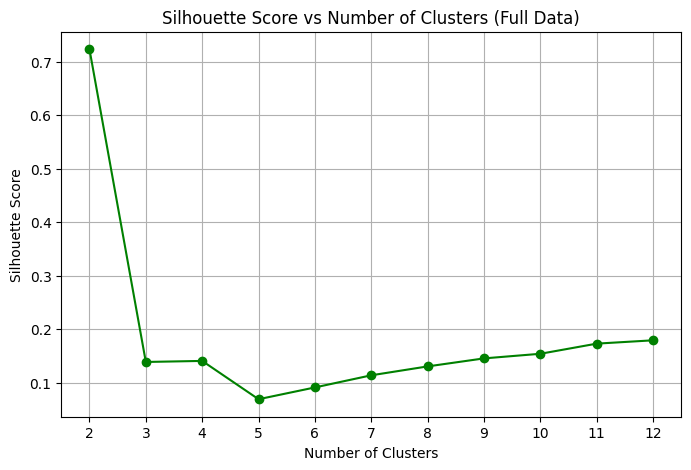

In [20]:
# Step 1: Load and preprocess full data
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('/content/processed_data.csv')  # Adjust path if needed

# Keep numeric data and drop missing values
df_numeric = df.select_dtypes(include=['float64', 'int64']).dropna()
print("Full dataset shape used:", df_numeric.shape)

# Scale the full data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)

# Step 2: Calculate and plot silhouette scores
silhouette_scores = []
cluster_range = range(2, 13)

for k in cluster_range:
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    silhouette_scores.append(score)

# Step 3: Plot the scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title("Silhouette Score vs Number of Clusters (Full Data)")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(cluster_range)
plt.show()


In [18]:
from sklearn.metrics import silhouette_score


cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['Cluster'] = cluster.fit_predict(scaled_data)

score = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.723157434361404


Choose the best resulting clusters:

After exploring and analyzing several clustering algorithms, including K-Means and Hierarchical Clustering, we evaluated their effectiveness and quality using metrics such as the silhouette score, which measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined and more well-separated clusters.


In our case, the highest silhouette score was obtained using Hierarchical Clustering with 2 clusters, achieving a score of 0.723. This indicates excellent cluster cohesion and separation, suggesting that this clustering configuration provides the most meaningful and reliable grouping of the data. Therefore, we selected Hierarchical Clustering with 2 clusters as the optimal solution.



